In [49]:
import numpy as np
import pandas as pd
import datetime
import nltk; nltk.download('popular')
from collections import defaultdict
import matplotlib.pyplot as plt
plt.close('all')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [50]:
dem_df = pd.read_csv("../Democrats/data/dem_data/dem_status_data.csv")
rep_df = pd.read_csv("../Republicans/data/rep_data/rep_status_data.csv")

In [51]:
dem_df

,user_name,status,datetime
0,Sen. Maggie Hassan,On the anniversary of the Pulse shooting we sh...,2020-06-12 18:18:08.419898
1,Jeanne Shaheen,The Portsmouth Naval Shipyard was founded 220 ...,2020-06-12 18:21:53.899517
2,Ed Markey,Trans rights are human rights and Donald Trump...,2020-06-12 18:52:04.348422
3,Tammy Duckworth,"For over a century, when our nation has asked ...",2020-06-12 18:54:17.823207
4,Kyrsten Sinema,Arizonans: @AZStateBar offers a hotline for le...,2020-06-12 19:00:06.251557
...,...,...,...
1158,Kamala Harris,The fact that law enforcement is using tear ga...,2020-06-21 20:38:05.813671
1159,Senator Jon Tester,Plowing a crop of peas under the big sky. A ha...,2020-06-21 20:46:16.876870
1160,Chuck Schumer,"It’s June 21, and the Trump admin is still sit...",2020-06-21 21:03:29.227718
1161,Doug Jones,A bittersweeet Father’s Day without Dad for th...,2020-06-21 21:41:07.857862


In [52]:
rep_df

,user_name,status,datetime
0,Ted Cruz,Pelosi calls for removing racist Democrats fro...,2020-06-12 18:15:28.971144
1,Marco Rubio,Today we sent a bipartisan list of questions t...,2020-06-12 18:37:02.087157
2,Sen. Marsha Blackburn,Chinese sweatshops and Communist blood money a...,2020-06-12 18:37:17.812156
3,Marco Rubio,Just FYI this headline is 100% false &amp; art...,2020-06-12 19:05:33.737982
4,Cindy Hyde-Smith,Today we honor the millions of women who have ...,2020-06-12 19:15:05.426970
...,...,...,...
899,Josh Hawley,"“Behold, children are a gift from the Lord!” P...",2020-06-21 19:55:45.029323
900,Ted Cruz,Nobody out-wokes the NFL. \n\nWhenever they re...,2020-06-21 20:03:48.686999
901,Ted Cruz,"Their ignorance knows no bounds. And, apparent...",2020-06-21 20:11:41.975273
902,Sen. Marsha Blackburn,The only thing transparent about this pandemic...,2020-06-21 20:24:50.678373


In [53]:
rep_date_list = []
for i in range(len(rep_df['datetime'])):
    rep_date_list.append(datetime.datetime.strptime(rep_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").day)


In [54]:
dem_date_list = []
for j in range(len(dem_df['datetime'])):
    dem_date_list.append(datetime.datetime.strptime(dem_df['datetime'].iloc[j], "%Y-%m-%d %H:%M:%S.%f").day)

In [55]:
current_date = datetime.datetime.now().strftime('%m-%d-%y')

date_range = pd.date_range(start='06-12-2020', end=current_date, freq='1D').day
print(date_range)

Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')


In [56]:
# Find out how many tweets were tweeted on each day
# For the Republicans
temp = set(rep_date_list)
rep_freq_list = []

for x in temp:
    rep_freq_list.append(rep_date_list.count(x))
    
temp = list(temp)
print(rep_freq_list)

[15, 46, 90, 81, 128, 185, 143, 105, 49, 61, 1]


In [57]:
# Find out how many tweets were tweeted on each day
# For the Democrats
temp = set(dem_date_list)
dem_freq_list = []

for x in temp:
    dem_freq_list.append(dem_date_list.count(x))
    
temp = list(temp)

print(dem_freq_list)

[28, 65, 67, 143, 171, 176, 199, 138, 99, 76, 1]


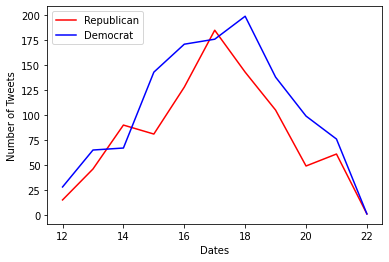

In [58]:
plt.plot(date_range, rep_freq_list, label="Republican", color='r')
plt.plot(date_range, dem_freq_list, label="Democrat", color='b')
plt.legend(loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Number of Tweets")
plt.show()

In [59]:
# parse user names out of the dataframe

dem_name_list = []
rep_name_list = []

for name in dem_df['user_name']:
    dem_name_list.append(str(name))
    
for name in rep_df['user_name']:
    rep_name_list.append(str(name))


In [60]:
dem_names = set(dem_df['user_name'])
rep_names = set(rep_df['user_name'])


all_name_count = {}

for name in dem_names:
    all_name_count[name] = dem_name_list.count(name)
    
for name in rep_names:
    all_name_count[name] = rep_name_list.count(name)


all_name_count = sorted(all_name_count.items(), key=lambda x: x[1], reverse=True)


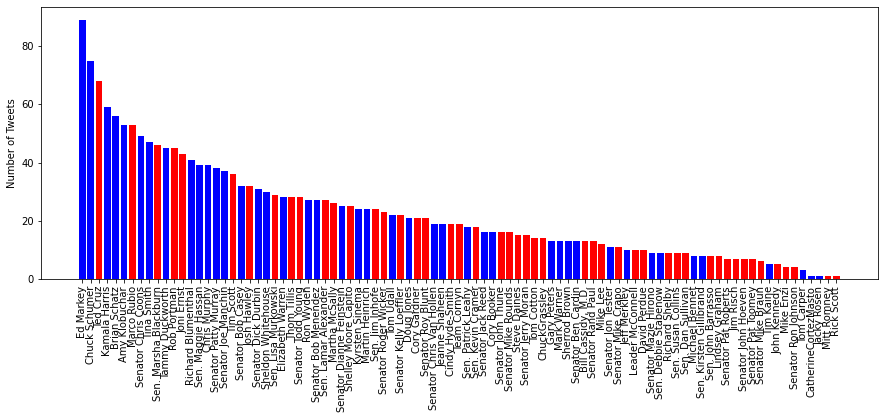

In [61]:
fig = plt.figure(figsize=(15,5))

for x in all_name_count:
    if x[0] in dem_name_list:
        plt.bar(x[0], x[1], color=('b'))
    elif x[0] in rep_name_list:
        plt.bar(x[0], x[1], color=('r'))


plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Number of Tweets")
plt.show()

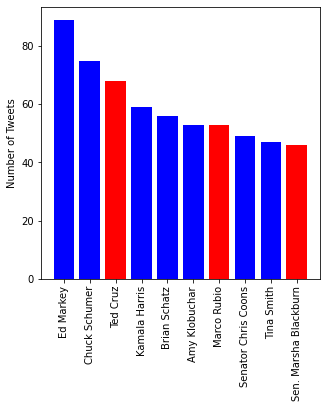

In [62]:
fig = plt.figure(figsize=(5,5))

for x in all_name_count[:10]:
    if x[0] in dem_name_list:
        plt.bar(x[0], x[1], color=('b'))
    elif x[0] in rep_name_list:
        plt.bar(x[0], x[1], color=('r'))


plt.xticks(rotation='vertical')
plt.ylabel("Number of Tweets")
plt.show()

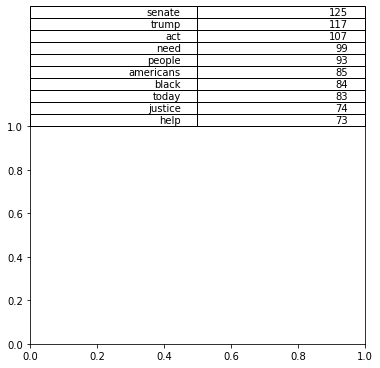

In [63]:
# Get statuses from dataframe in string form.

status_list = []
status_dict = {}

for status in dem_df['status']:
    for word in status.split():
        token = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(token)
        if tagged[0][1][0] == 'N':
            status_list.append(word.lower())
     
        
set_status_list = set(status_list)

for word in set_status_list:
    status_dict[word] = status_list.count(word)
    
status_dict = sorted(status_dict.items(), key=lambda x: x[1], reverse=True)
table_list = []

for tup in status_dict[:10]:
    tup = list(tup)
    tup[1] = str(tup[1])
    table_list.append(tup)
    
plt.table(table_list, loc='top')
plt.show()


In [64]:
status_list = []
status_dict = {}

for status in rep_df['status']:
    for word in status.split():
        token = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(token)
        if tagged[0][1][0] == 'N':
            status_list.append(word.lower())
     
        
set_status_list = set(status_list)

for word in set_status_list:
    status_dict[word] = status_list.count(word)
    
status_dict = sorted(status_dict.items(), key=lambda x: x[1], reverse=True)

for tup in status_dict[:10]:
    print(tup)



('senate', 77)
('help', 75)
('act', 64)
('work', 62)
('police', 59)
('today', 57)
('support', 54)
('legislation', 51)
('great', 49)
('day', 45)
